# Assignment 3

## Group members

- Erdem Halil - gushaliler@student.gu.se

## Problem 1

#### Implement Complex class

In [49]:
class Complex():
    def __init__(self, real=0, imag=0):
        self.__real = real
        self.__imag = imag

    @property
    def real(self):
        return self.__real

    @property
    def imag(self):
        return self.__imag

    def __str__(self):
        if self.__imag == 0:
            return f"{self.__real}"
        
        if self.__imag < 0:
            return f"{self.__real}{self.__imag}i"
        
        return f"{self.__real}+{self.__imag}i"

    def __add__(self, other):
        if isinstance(other, Complex):
            return Complex(self.__real + other.real, self.__imag + other.imag)
        else:
            raise TypeError("Unsupported operand type for +")

    def __sub__(self, other):
        if isinstance(other, Complex):
            return Complex(self.__real - other.real, self.__imag - other.imag)
        else:
            raise TypeError("Unsupported operand type for -")

    def __mul__(self, other):
        if isinstance(other, Complex):
            return Complex(
                self.__real * other.real - self.__imag * other.imag,
                self.__real * other.imag + self.__imag * other.real
            )
        else:
            raise TypeError("Unsupported operand type for *")

    def __truediv__(self, other):
        if isinstance(other, Complex):
            divisor = other.real ** 2 + other.imag ** 2
            return Complex(
                (self.__real * other.real + self.__imag * other.imag) / divisor,
                (self.__imag * other.real - self.__real * other.imag) / divisor
            )
        else:
            raise TypeError("Unsupported operand type for /")

    def __eq__(self, other):
        if isinstance(other, Complex):
            return self.__real == other.real and self.__imag == other.imag
        else:
            return False

    def __ne__(self, other):
        return not self.__eq__(other)

    def conjugate(self):
        return Complex(self.__real, -self.__imag)

    def norm(self):
        return (self.__real ** 2 + self.__imag ** 2) ** 0.5
    
# Assignment tests
z1 = Complex(1, 2)
z2 = Complex(5, -2)
z3 = Complex(-2, 3)
print(z1 + z2)
print(z3 - z1)
print(z1 * z2)
print(z1 * z2 / z3)
print(z1 == z1)
print(z2 != z3)
print(z1.conjugate())
print(Complex.norm(z1*z2*z3))

6
-3+1i
9+8i
0.46153846153846156-3.3076923076923075i
True
True
1-2i
43.41658669218482


#### Plot numbers with `pyplot`

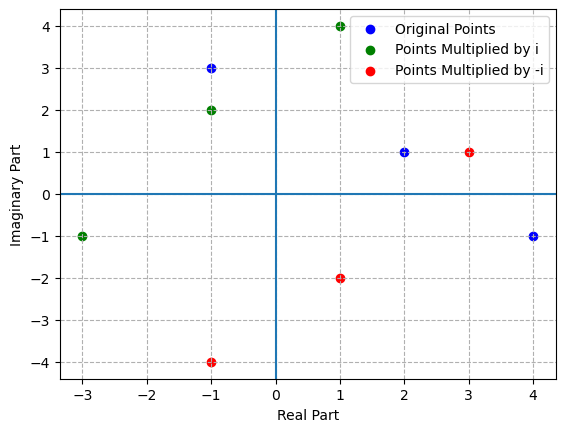

In [50]:
import matplotlib.pyplot as plt

# Define the original complex numbers
z1 = Complex(2, 1)
z2 = Complex(-1, 3)
z3 = Complex(4, -1)

points = [z1, z2, z3]

# Extract the real and imaginary parts of the complex numbers
real_parts = [point.real for point in points]
imag_parts = [point.imag for point in points]

# Multiply each point by i
i = Complex(0, 1)
points_i = [point * i for point in points]

# Extract the real and imaginary parts of the new points after multiplying by i
real_parts_i = [point.real for point in points_i]
imag_parts_i = [point.imag for point in points_i]

# Multiply the original points by -i
neg_i = Complex(0, -1)
points_minus_i = [point * neg_i for point in points]

# Extract the real and imaginary parts of the new points after multiplying by -i
real_parts_minus_i = [point.real for point in points_minus_i]
imag_parts_minus_i = [point.imag for point in points_minus_i]

# Create a scatter plot
plt.scatter(real_parts, imag_parts, label='Original Points', color='blue')
plt.scatter(real_parts_i, imag_parts_i, label='Points Multiplied by i', color='green')
plt.scatter(real_parts_minus_i, imag_parts_minus_i, label='Points Multiplied by -i', color='red')

# Add labels and legend
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(visible=True, linestyle="--")
plt.axhline(y=0)
plt.axvline(x=0)
plt.legend()
plt.show()

When multiplying by `i`, the points are rotated counterclockwise by 90 degrees in the complex plane.

When multiplying by `-i`, the points are rotated clockwise by 90 degrees in the complex plane.

#### Explain the benefit of built-in dunder methods

- Customization of the behavior of your custom classes, making them more intuitive. You can define how objects of your class should behave in various contexts, such as addition, subtraction etc.
- Provide a consistent interface for your custom classes, making them more familiar to those who are used to built-in types in Python. For example, defining `__len__` for your custom collection class allows users to use len(my_collection) just like they would with a built-in list.
- Enable polymorphism, where different objects can respond to common operators and functions in a consistent way.

#### Explain why one might want to use static methods

- Static methods can be called directly on the class itself without needing an instance of the class. This makes them accessible from anywhere in your code without the overhead of creating objects. This can be especially useful for utility functions or methods that perform tasks unrelated to a specific instance of a class.
- Static methods can help you group related functionality within a class without the need for an instance. This can improve the organization and readability of your code, as it becomes clear that these methods are logically tied to the class but do not depend on its state.

## Problem 2

#### Define a Cipher class  

In [51]:
class Cipher():
    def __init__(self, sender, receiver): # Initialize the cipher with sender and receiver
        self._sender = sender 
        self._receiver = receiver

    @property # Getter method to get the sender
    def sender(self):
        return self._sender

    @sender.setter # Setter method to set the sender
    def sender(self, sender):
        self._sender = sender

    @property # Getter method to get the receiver
    def receiver(self):
        return self._receiver

    @receiver.setter # Setter method to set the receiver
    def receiver(self, receiver):
        self._receiver = receiver

basic_cipher = Cipher("Alice", "Bob")
print(basic_cipher.sender)
print(basic_cipher.receiver)

Alice
Bob


#### Define an AlphabetCipher class

In [52]:
class AlphabetCipher(Cipher):
    def __init__(self, sender, receiver, key):
        super().__init__(sender, receiver)
        self.key = key

    def _shift(self, char, key):
        if char.isalpha():
            shifted_char = chr(((ord(char) - ord('A') + key) % 26) + ord('A'))
            return shifted_char
        return char  # Preserve non-alphabet characters, including spaces
    
    def encode(self, message):
        encoded_message = ""
        for char in message:
            encoded_message += self._shift(char, self.key)
        return encoded_message

    def decode(self, encoded_message):
        decoded_message = ""
        for char in encoded_message:
            decoded_message += self._shift(char, -self.key)
        return decoded_message


alphaCipher = AlphabetCipher("Alice", "Bob", 2)
encodedString = alphaCipher.encode("PYTHON IS A PROGRAMMING LANGUAGE")
print(encodedString)
decodedString = alphaCipher.decode(encodedString)
print(decodedString)


RAVJQP KU C RTQITCOOKPI NCPIWCIG
PYTHON IS A PROGRAMMING LANGUAGE


#### Define an XORCipher class

In [53]:
class XORCipher(Cipher):
    def __init__(self, sender, receiver, key):
        super().__init__(sender, receiver)
        if len(key) != 1:
            raise ValueError("Key should be a single capital letter")
        if not 'A' <= key <= 'Z':
            raise ValueError("Key should be A-Z")
        self.key = key

    def encode(self, message):
        encoded_message = []
        for char in message:
            if not char == " ": # Can't use .isalpha() as it messes with decoding
                encoded_char = chr(ord(char) ^ ord(self.key))
                encoded_message.append(encoded_char)
                continue
            encoded_message.append(char) # Preserve non-alphabet characters, including spaces
        return "".join(encoded_message)

    def decode(self, encoded_message):
        return self.encode(encoded_message)  # XOR again to get the decoded message

xorcipher = XORCipher("Alice", "Bob", "A")
encodedString = xorcipher.encode("THIS IS A SECRET MESSAGE")
print([char for char in encodedString])
decodedString = xorcipher.decode(encodedString)
print(decodedString)


['\x15', '\t', '\x08', '\x12', ' ', '\x08', '\x12', ' ', '\x00', ' ', '\x12', '\x04', '\x02', '\x13', '\x04', '\x15', ' ', '\x0c', '\x04', '\x12', '\x12', '\x00', '\x06', '\x04']
THIS IS A SECRET MESSAGE


#### Define a HybridCipher class

In [54]:
class HybridCipher(Cipher):
    def __init__(self, sender, receiver, alpha_key, xor_key):
        super().__init__(sender, receiver)
        # Couldn't make it work with multiple inheritance so I used composition-like structure
        self.alpha_cipher = AlphabetCipher(sender, receiver, alpha_key)
        self.xor_cipher = XORCipher(sender, receiver, xor_key)


    def encode(self, message):
        encoded_message = self.alpha_cipher.encode(message)
        encoded_message = self.xor_cipher.encode(encoded_message)
        return encoded_message

    def decode(self, encoded_message):
        decoded_message = self.xor_cipher.decode(encoded_message)
        decoded_message = self.alpha_cipher.decode(decoded_message)
        return decoded_message



hybrid = HybridCipher("Alice", "Bob", 12, "F")
encodedString = hybrid.encode("THIS IS ANOTHER SECRET MESSAGE")
print([char for char in encodedString])
decodedString = hybrid.decode(encodedString)
print(decodedString)

['\x00', '\x12', '\x13', '\x03', ' ', '\x13', '\x03', ' ', '\x0b', '\x1c', '\x07', '\x00', '\x12', '\x17', '\x02', ' ', '\x03', '\x17', '\t', '\x02', '\x17', '\x00', ' ', '\x1f', '\x17', '\x03', '\x03', '\x0b', '\x15', '\x17']
THIS IS ANOTHER SECRET MESSAGE
